# How to build an AFF3CT custom module

In this tutorial you will learn how to build a custom AFF3CT module written in `Python`. The module called `py_modulator` performs BPSK modulation. It has one inputs `b` representing the `N` bits to be modulated and one output `x` which represents the modulated symbols. The full code of the `py_modulator` module is given below.

In [1]:
import numpy as np
import sys  
sys.path.insert(0, '../../build/lib')
from py_aff3ct.module.py_module import Py_Module

# Step 1
class py_modulator(Py_Module):

    # Step 2
    def bpsk(self, b, x): # Your original code (independently from aff3ct)
        x[:] = 1.0 - 2.0*b[:]
        return 0
    
    # Step 3
    def __init__(self, N):
        # __init__ (step 3.1)
        Py_Module.__init__(self) # Call the aff3ct Py_Module __init__
        self.name = "py_BPSK"   # Set your module's name

        # __init__ (step 3.2)
        t_mod = self.create_task("modulate") # create a task for your module
        
        # __init__ (step 3.3)
        sb = self.create_socket_in (t_mod, "b", N, np.int32  ) # create an input socket for the task t_mod
        sx = self.create_socket_out(t_mod, "x", N, np.float32) # create an output socket for the task t_mod
    
        # __init__ (step 3.4)
        self.create_codelet(t_mod, lambda slf, lsk, fid: slf.bpsk(lsk[sb], lsk[sx])) # create codelet

In the previous code block we start by importing the minimual packages for building an `py_aff3ct` module.
We need `numpy` for the socket handling, `sys` for adding the path of `py_aff3ct` to the python path.
We also need to import the `Py_Module` module of `py_aff3ct`.
```python
import numpy as np
import sys  
sys.path.insert(0, '../build/lib')
from py_aff3ct.module.py_module import Py_Module
```

**Step 1** Once this import is performed, building a custom `module` for `py_aff3ct` basically consists in writing a Python class heritating from the class `Py_Module`. This explains the `py_modulator` definition
```python
class py_modulator(Py_Module):
```

**Step 2** Write the effective data processing. Here this processing a method of the created class and it corresponds to the following piece of code
```python
def bpsk(self, b, x): # Your original code (independently from aff3ct)
    x[:] = 1.0 - 2.0*b[:]
    return 0
```

* **Remark 1** Here we impose that data passed through sockets are inputs of the function and the function returns an integer.

* **Remark 2** In `aff3ct`, a socket should have a well defined size and type, so we have decided (here) that `b` is a `numpy`array of size `N` and type `np.int32` while `x` is a `numpy`array of size `N` and type `np.float32`. 

**Step 3** Write the `__init__` method. Here the size of the input and output arrays is used for the class initialization.

```python
def __init__(self, N):
```

**Step 3.1**,  since our class inheritates from `Py_Module` the `__init__` method of the `Py_Module` class should be called. `Py_Module` classes have a `name`attribute that we have also set.
```python
    # __init__ (step 3.1)
    Py_Module.__init__(self) # Call the aff3ct Py_Module __init__
    self.name = "py_BPSK"   # Set your module's name
```

**Step 3.2** is to create an empty AFF3CT task and give it a name (here the name of the task is "modulate").
```python
    # __init__ (step 3.2)
    t_mod = self.create_task("modulate") # create a task for your module
```

**Step 3.3** add sockets to the created task. In `aff3ct`, sockets has a given **size** and **type**. For this example we have defined the following sockets:
* Input  socket named `b`, size `N`, data type `np.int32`
* Output socket named `z`, size `N`, data type `np.float32`

The socket declaration is done in the following part of the code:
```python
    # __init__ (step 3.3)
    sb = self.create_socket_in (t_mod, "b", N, np.int32  ) # create an input socket for the task t_mod
    sx = self.create_socket_out(t_mod, "x", N, np.float32) # create an output socket for the task t_mod
```

* **Remark 1**: the name and order of declaration of the socket can be different from the order of the function arguments.

* **Remark 2**: AFF3CT handles the following data types :
    * `np.int8`
    * `np.int16`
    * `np.int32`
    * `np.int64`
    * `np.float32`
    * `np.double`
        
**Step 3.4** "Link" everything by creating a `codelet` for the task `t_mod`. A `codelet`is basically a `lambda` function that is attached to a `task` and that has the following signature: 
```
(aff3ct.module.Module, List[aff3ct.module.Socket], Int) -> Int
```

This lambda function is the one called by AFF3CT. Its inputs represent
* an AFF3CT module that can be thought as `self`
* a List of `sockets`, the ones created above in the class definition in the order of creation
* a frame id (not used in this example)

The `codelet` creation is performed by the following line
```python
    # __init__ (step 3.4)
    self.create_codelet(t_mod, lambda slf, lsk, fid: slf.bpsk(lsk[sb], lsk[sx])) # create codelet
```

**Remark**: inputs b and x of the method `bpsk` are sockets whereas when first writting the function these inputs could have been `numpy` arrays. The hack is here to use the syntax `[]` for a `socket` object which returns a `numpy` array.


Now that our `module` is created, let's use it !

 Eb/NO (dB) | Frame number |    BER   |    FER   |  Tpt (Mbps)
------------|--------------|----------|----------|------------
       0.00 |          100 | 1.70e-01 | 1.00e+00 |       0.24
       0.25 |          103 | 1.57e-01 | 9.71e-01 |       0.25
       0.50 |          107 | 1.50e-01 | 9.35e-01 |       0.23
       0.75 |          117 | 1.26e-01 | 8.55e-01 |       0.25
       1.00 |          137 | 1.00e-01 | 7.30e-01 |       0.29
       1.25 |          209 | 6.41e-02 | 4.78e-01 |       0.38
       1.50 |          327 | 3.79e-02 | 3.06e-01 |       0.50
       1.75 |          798 | 1.45e-02 | 1.25e-01 |       0.76
       2.00 |         2369 | 4.82e-03 | 4.22e-02 |       1.41
       2.25 |         8433 | 1.27e-03 | 1.19e-02 |       2.01
       2.50 |        37423 | 2.76e-04 | 2.67e-03 |       2.53
       2.75 |       277816 | 3.33e-05 | 3.60e-04 |       2.80


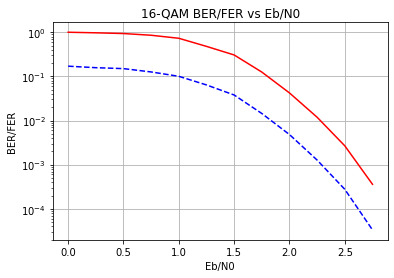

In [2]:

import py_aff3ct.tools.sparse_matrix as sp
import time
import math
import matplotlib.pyplot as plt

# Build the modules

H   = sp.alist.read("../../lib/aff3ct/conf/dec/LDPC/WIMAX_288_576.alist")
N   = H.shape[0]
m   = H.shape[1]
K   = N-m
R   = K/N
bps = 1      # Bits per Symbols   
Ns  = N//bps # Packet size in symbols
I   = 100
FE  = 1000

ebn0_min = 0
ebn0_max = 3.0
ebn0_step = 0.25

ebn0 = np.arange(ebn0_min,ebn0_max,ebn0_step)
esn0 = ebn0 + 10 * math.log10(R)
sigma_vals = 1/(math.sqrt(2) * 10 ** (esn0 / 20))

src  = py_aff3ct.module.source.Source_random           (K      )                                                   # Build source
enc  = py_aff3ct.module.encoder.Encoder_LDPC_from_H    (K, N, H)                                                   # Build the encoder
cstl = py_aff3ct.tools.constellation.Constellation_PSK(bps    )                                                   # Setup constellation tool

mdm    = py_aff3ct.module.modem.Modem_BPSK_fast(Ns)                                                   # Build the modem
my_mdm = py_modulator(Ns)

chn  = py_aff3ct.module.channel.Channel_AWGN_LLR       (Ns   )                                                   # Build the channel (Ns complex symbols = 2Ns real dims)
dec  = py_aff3ct.module.decoder.Decoder_LDPC_BP_horizontal_layered_inter_NMS (K, N, I, H, enc.get_info_bits_pos()) # Build the decoder
mnt  = py_aff3ct.module.monitor.Monitor_BFER_AR        (K,100  )                                                   # Build the monitor (counting errors)

src   ["generate   ::U_K"] = enc   ["encode      ::U_K"]
enc   ["encode     ::X_N"] = my_mdm["modulate    ::b  "]
my_mdm["modulate   ::x  "] = chn   ["add_noise   ::X_N"]
chn   ["add_noise  ::Y_N"] = mdm   ["demodulate ::Y_N1"] 

mdm["demodulate ::Y_N2"] = dec["decode_siho ::Y_N"]
dec["decode_siho::V_K" ] = mnt["check_errors ::V "]
src["generate    ::U_K"] = mnt["check_errors ::U "]

sigma = np.ndarray(shape = (1,1),  dtype = np.float32)
chn[ 'add_noise::CP'] = sigma
mdm['demodulate::CP'] = sigma

fer = np.zeros(len(ebn0))
ber = np.zeros(len(ebn0))

print(" Eb/NO (dB) | Frame number |    BER   |    FER   |  Tpt (Mbps)")
print("------------|--------------|----------|----------|------------")
for i in range(len(sigma_vals)):
	mnt.reset()
	sigma[:] = sigma_vals[i]

	t = time.time()
	while not mnt.is_done():
		src['generate'    ].exec()
		enc['encode'      ].exec()
		my_mdm['modulate'    ].exec()
		chn['add_noise'   ].exec()
		mdm['demodulate'  ].exec()
		dec['decode_siho' ].exec()
		mnt['check_errors'].exec()
	elapsed = time.time() - t
	total_fra = mnt.get_n_analyzed_fra()

	ber[i] = mnt.get_ber()
	fer[i] = mnt.get_fer()

	tpt = total_fra * K * 1e-6/elapsed
	print("%11.2f | %12d | %7.2e | %7.2e | %10.2f"%(ebn0[i], total_fra, ber[i], fer[i], tpt))
    

fig = plt.figure()
plt.title("16-QAM BER/FER vs Eb/N0")
plt.xlabel("Eb/N0")
plt.ylabel("BER/FER")
plt.grid()
plt.semilogy(ebn0, fer, 'r-', ebn0, ber, 'b--')
plt.show()

